# Analysis of a Stock

## Importing Libraries

In [50]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import numpy as np


## Utils

In [51]:
def formatter(x, pos):
    return str(round(x / 1e9, 1)) + "B"

def display_bar_plot(x_group, x_values, y_values, settings):
    fig, ax = plt.subplots()
    width = 0.35
    plt.rc("figure", figsize=[8, 6])

    groups = np.arange(x_group)

    if settings["is_y_axis_formatted"]:
        ax.yaxis.set_major_formatter(formatter)
        ax.yaxis.set_minor_formatter(NullFormatter())

    plt.bar(groups, y_values, width)
    plt.xticks(groups, x_values)
    plt.title(settings['title'])
    plt.xlabel(settings['xlabel'])
    plt.ylabel(settings['ylabel'])

    return plt.show()

def display_stacked_bar_plot(x_group, x_values, y_values, settings):
    plt.rc("figure", figsize=[8, 6])
    groups = np.arange(x_group)

    ax = y_values.plot.bar(stacked=True)

    if settings["is_y_axis_formatted"]:
        ax.yaxis.set_major_formatter(formatter)
        ax.yaxis.set_minor_formatter(NullFormatter())
    
    plt.xticks(groups, x_values, rotation=0)
    plt.title(settings['title'])
    plt.xlabel(settings['xlabel'])
    plt.ylabel(settings['ylabel'])
    
    return plt.show()

def display_nested_bar_plot(x_group, x_values, y_group_1, y_group_2, settings):
    width = 0.35
    fig, ax = plt.subplots()
    plt.rc("figure", figsize=[8, 6])

    groups = np.arange(x_group)
    
    plt.bar(groups, y_group_1["values"], width, label=y_group_1["label"])
    plt.bar(groups+width, y_group_2["values"], width, label=y_group_2["label"])
    
    if settings["is_y_axis_formatted"]:
        ax.yaxis.set_major_formatter(formatter)
        ax.yaxis.set_minor_formatter(NullFormatter())

    plt.xticks(groups+width/2, x_values)
    plt.title(settings['title'])
    plt.xlabel(settings['xlabel'])
    plt.ylabel(settings['ylabel'])
    plt.legend(settings["legend"])


    return plt.show()

## Setting Up Company Information

In [52]:
ticker = "MSFT"
company = yf.Ticker(ticker)
print(company)

prices_history = company.history(period="max", interval="1d")
prices_history.head(10)

yfinance.Ticker object <MSFT>


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054693,0.062736,0.054693,0.060055,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060055,0.063272,0.060055,0.062199,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062199,0.063808,0.062199,0.063272,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063272,0.063808,0.061127,0.061663,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061663,0.062199,0.060055,0.060591,47894400,0.0,0.0
1986-03-20 00:00:00-05:00,0.060591,0.060591,0.058446,0.058982,58435200,0.0,0.0
1986-03-21 00:00:00-05:00,0.058982,0.060055,0.056301,0.057374,59990400,0.0,0.0
1986-03-24 00:00:00-05:00,0.057374,0.057374,0.055229,0.055765,65289600,0.0,0.0
1986-03-25 00:00:00-05:00,0.055765,0.056838,0.055229,0.056838,32083200,0.0,0.0


## Exploratory Data Analysis

### Descriptive Statistics

In [53]:
prices_history.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,9681.000000,9681.000000,9681.000000,9681.000000,9.681000e+03,9681.000000,9681.000000
mean,53.129155,53.665248,52.575499,53.142590,5.674932e+07,0.002979,0.001756
std,90.807542,91.653663,89.905743,90.826709,3.813509e+07,0.046502,0.057917
min,0.054693,0.056838,0.054693,0.055765,2.304000e+06,0.000000,0.000000
25%,3.522850,3.571108,3.474593,3.522850,3.203820e+07,0.000000,0.000000
50%,19.173660,19.432970,18.990618,19.192099,4.986240e+07,0.000000,0.000000
75%,38.409548,38.829939,38.126813,38.562336,7.071040e+07,0.000000,0.000000
max,467.000000,468.350006,464.459991,467.559998,1.031789e+09,3.080000,2.000000


### Missing Values

In [54]:
display(prices_history.isnull().sum())

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

### Data Distribution

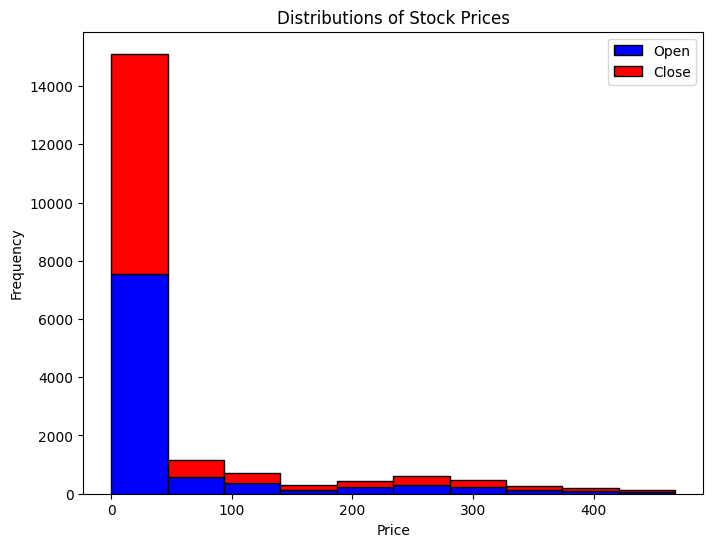

In [55]:
open_prices = prices_history["Open"]
close_prices = prices_history["Close"]

plt.figure(figsize=(8, 6))
plt.hist([open_prices, close_prices], stacked=True, color=["blue", "red"], edgecolor='black')
plt.title("Distributions of Stock Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend(["Open", "Close"])

plt.show()

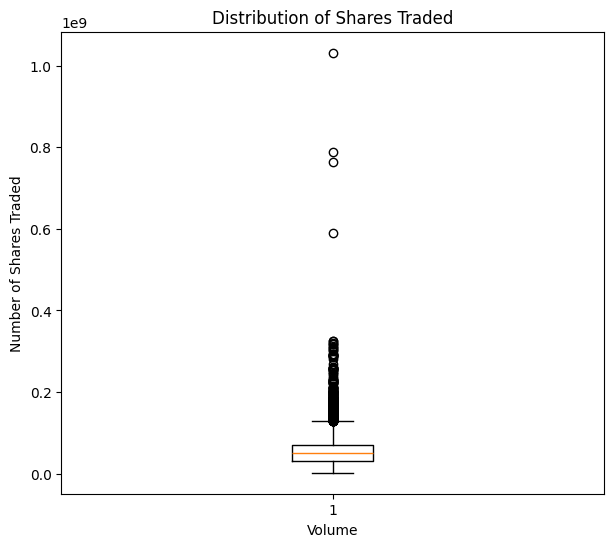

In [56]:
volume = prices_history["Volume"]

plt.rc('figure', figsize=(7, 6))
plt.boxplot(volume)
plt.title("Distribution of Shares Traded")
plt.xlabel("Volume")
plt.ylabel("Number of Shares Traded")

plt.show()

### Visualisation of Historic Stock Prices 

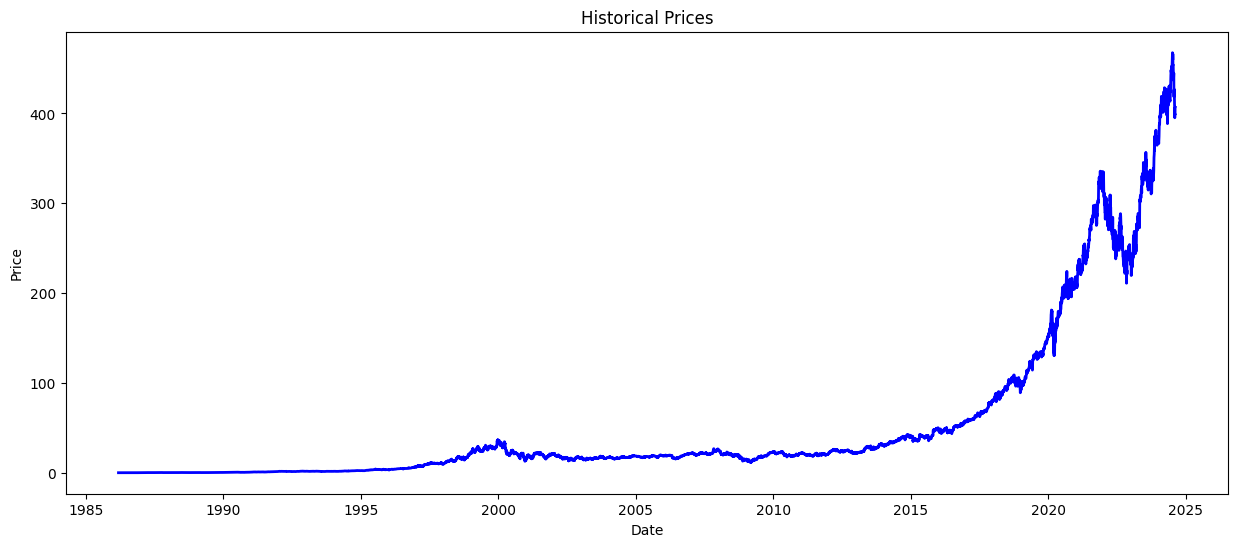

In [57]:
close_prices = prices_history["Close"]
date = prices_history.index.values

plt.rc('figure', figsize=(15, 6))
plt.plot(date, close_prices, color="blue", linewidth=2, label="Price")
plt.title("Historical Prices")
plt.xlabel("Date")
plt.ylabel("Price")

plt.show()

## Fundamental Analysis

In [58]:
all_info = company.info
all_info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power 

In [59]:
fields = ["trailingPE", "dividendYield", "payoutRatio", "trailingEps", "returnOnAssets", "returnOnEquity", "marketCap", "operatingCashflow"]

df_ratios = pd.DataFrame(all_info.items(), columns=["Ratio", "Value"]).set_index("Ratio")
df_ratios = df_ratios.loc[fields, :]

df_ratios = df_ratios.transpose()
df_ratios = df_ratios.rename(columns={"trailingPE": "Price Earnings Ratio", "dividendYield": "Dividend Yield", "payoutRatio": "Payout Ratio", "trailingEps": "Earnings Per Share", "returnOnAssets": "Return on Assets", "returnOnEquity": "Return on Equity", "marketCap": "Market Cap", "operatingCashflow": "Operating Cash Flow"})

df_ratios["Price/Cash Flow"] = df_ratios["Market Cap"] / df_ratios["Operating Cash Flow"]
df_ratios = df_ratios.drop(columns=["Operating Cash Flow"])
df_ratios


Ratio,Price Earnings Ratio,Dividend Yield,Payout Ratio,Earnings Per Share,Return on Assets,Return on Equity,Market Cap,Price/Cash Flow
Value,34.47542,0.0074,0.2483,11.8,0.14802,0.37133,3023834972160,25.507263


### Balance Sheet

In [60]:
balance_sheet = company.balance_sheet
balance_sheet.head(10)

,2024-06-30,2023-06-30,2022-06-30,2021-06-30
Ordinary Shares Number,7434000000.0,7432000000.0,7464000000.0,7519000000.0
Share Issued,7434000000.0,7432000000.0,7464000000.0,7519000000.0
Net Debt,33315000000.0,12533000000.0,35850000000.0,43922000000.0
Total Debt,67127000000.0,59965000000.0,61270000000.0,67775000000.0
Tangible Book Value,121660000000.0,128971000000.0,87720000000.0,84477000000.0
Invested Capital,320107000000.0,253460000000.0,216323000000.0,200134000000.0
Working Capital,34448000000.0,80108000000.0,74602000000.0,95749000000.0
Net Tangible Assets,121660000000.0,128971000000.0,87720000000.0,84477000000.0
Capital Lease Obligations,15497000000.0,12728000000.0,11489000000.0,9629000000.0
Common Stock Equity,268477000000.0,206223000000.0,166542000000.0,141988000000.0


In [61]:
fields = ["Current Assets", "Current Liabilities", "Total Assets", "Total Liabilities Net Minority Interest", "Total Capitalization", "Working Capital", "Invested Capital", "Total Debt", "Net Debt", "Stockholders Equity"]

df_balance = balance_sheet.loc[fields, :]
df_balance.loc["Debt to Equity"] = (df_balance.loc["Total Liabilities Net Minority Interest"] / df_balance.loc["Stockholders Equity"])
df_balance.loc["Current Ratio"] = (df_balance.loc["Current Assets"] / df_balance.loc["Current Liabilities"])
df_balance

,2024-06-30,2023-06-30,2022-06-30,2021-06-30
Current Assets,159734000000.0,184257000000.0,169684000000.0,184406000000.0
Current Liabilities,125286000000.0,104149000000.0,95082000000.0,88657000000.0
Total Assets,512163000000.0,411976000000.0,364840000000.0,333779000000.0
Total Liabilities Net Minority Interest,243686000000.0,205753000000.0,198298000000.0,191791000000.0
Total Capitalization,311165000000.0,248213000000.0,213574000000.0,192062000000.0
Working Capital,34448000000.0,80108000000.0,74602000000.0,95749000000.0
Invested Capital,320107000000.0,253460000000.0,216323000000.0,200134000000.0
Total Debt,67127000000.0,59965000000.0,61270000000.0,67775000000.0
Net Debt,33315000000.0,12533000000.0,35850000000.0,43922000000.0
Stockholders Equity,268477000000.0,206223000000.0,166542000000.0,141988000000.0


In [62]:
df_balance = df_balance.transpose()
df_balance = df_balance.rename(columns={"Total Liabilities Net Minority Interest": "Total Liabilities"})
df_balance = df_balance.sort_index()
df_balance

,Current Assets,Current Liabilities,Total Assets,Total Liabilities,Total Capitalization,Working Capital,Invested Capital,Total Debt,Net Debt,Stockholders Equity,Debt to Equity,Current Ratio
2021-06-30,184406000000.0,88657000000.0,333779000000.0,191791000000.0,192062000000.0,95749000000.0,200134000000.0,67775000000.0,43922000000.0,141988000000.0,1.350755,2.079994
2022-06-30,169684000000.0,95082000000.0,364840000000.0,198298000000.0,213574000000.0,74602000000.0,216323000000.0,61270000000.0,35850000000.0,166542000000.0,1.190679,1.784607
2023-06-30,184257000000.0,104149000000.0,411976000000.0,205753000000.0,248213000000.0,80108000000.0,253460000000.0,59965000000.0,12533000000.0,206223000000.0,0.997721,1.769167
2024-06-30,159734000000.0,125286000000.0,512163000000.0,243686000000.0,311165000000.0,34448000000.0,320107000000.0,67127000000.0,33315000000.0,268477000000.0,0.907661,1.274955


### Assets and Liabilities Plot

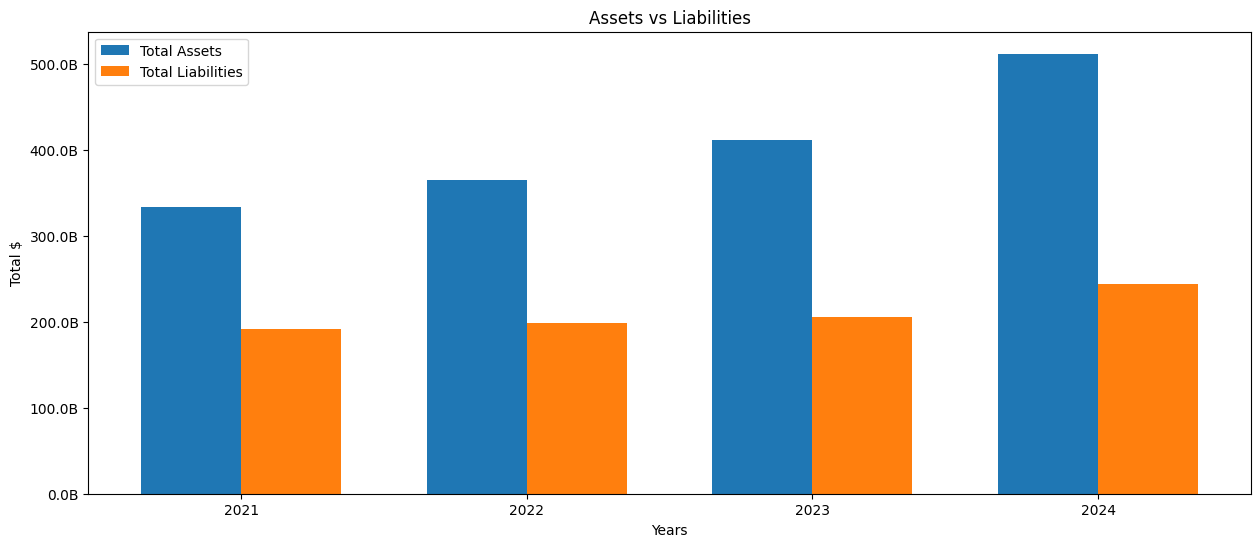

In [63]:
x_group = 4
x_values = pd.DatetimeIndex(df_balance.index).year
y_group_1 = {
    "label": "Assets",
    "values": df_balance["Total Assets"].values
}
y_group_2 = {
    "label": "Liabilities",
    "values": df_balance["Total Liabilities"].values
}
settings = {
    "title": "Assets vs Liabilities",
    "xlabel": "Years",
    "ylabel": "Total $",
    "legend": ["Total Assets", "Total Liabilities"],
    "is_y_axis_formatted": True,
}

display_nested_bar_plot(x_group, x_values, y_group_1, y_group_2, settings)

### Debt Plot

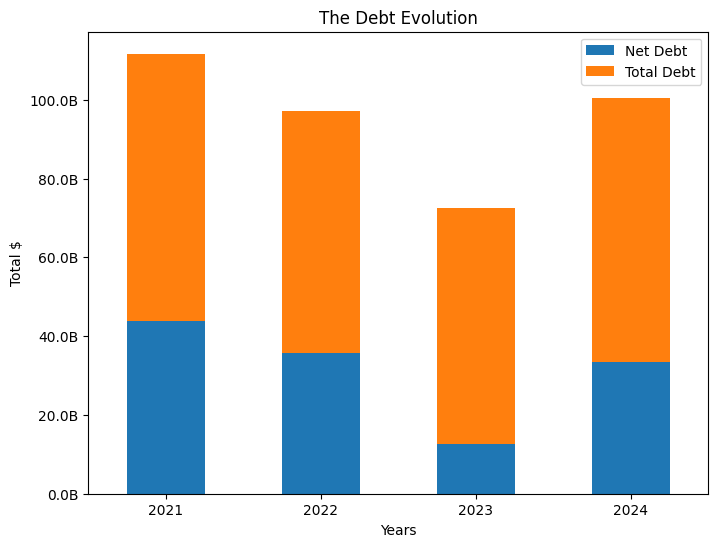

In [64]:
x_group = 4
x_values = pd.DatetimeIndex(df_balance.index).year
y_values = df_balance.loc[:, ["Net Debt", "Total Debt"]]
settings = {
    "title": "The Debt Evolution",
    "xlabel": "Years",
    "ylabel": "Total $",
    "is_y_axis_formatted": True,
}
display_stacked_bar_plot(x_group, x_values, y_values, settings)

### Liquidity and Efficiency Plot

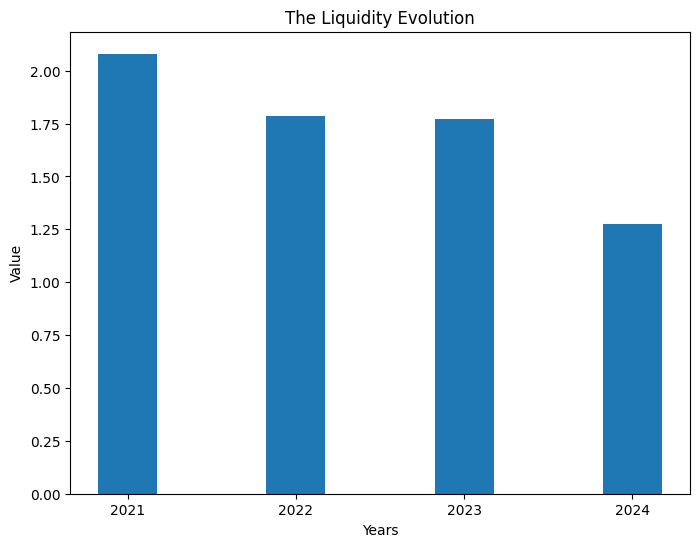

In [65]:
x_group = 4
x_values = pd.DatetimeIndex(df_balance.index).year
y_values = df_balance["Current Ratio"].values
settings = {
    "title": "The Liquidity Evolution",
    "xlabel": "Years",
    "ylabel": "Value",
    "is_y_axis_formatted": False
}

display_bar_plot(x_group, x_values, y_values, settings)

### Investment and Financing Plots

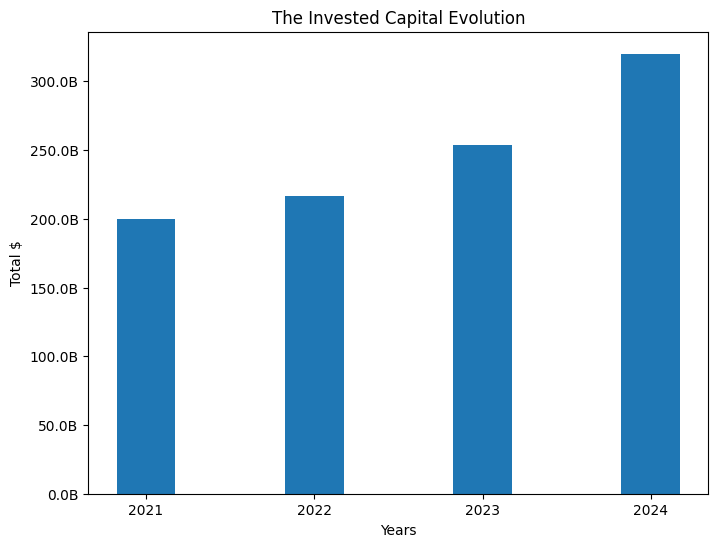

In [66]:
x_group = 4
x_values = pd.DatetimeIndex(df_balance.index).year
y_values = df_balance["Invested Capital"].values
settings = {
    "title": "The Invested Capital Evolution",
    "xlabel": "Years",
    "ylabel": "Total $",
    "is_y_axis_formatted": True
}

display_bar_plot(x_group, x_values, y_values, settings)

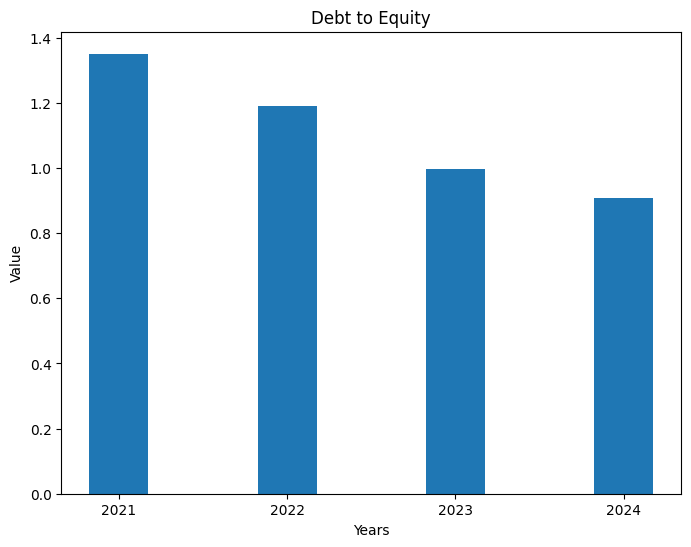

In [67]:
x_group = 4
x_values = pd.DatetimeIndex(df_balance.index).year
y_values = df_balance["Debt to Equity"].values
settings = {
    "title": "Debt to Equity",
    "xlabel": "Years",
    "ylabel": "Value",
    "is_y_axis_formatted": False
}

display_bar_plot(x_group, x_values, y_values, settings)

### Income Statement

In [68]:
income_statement = company.income_stmt
income_statement

,2024-06-30,2023-06-30,2022-06-30,2021-06-30
Tax Effect Of Unusual Items,-99918000.0,-2850000.0,43754000.0,180160797.164637
Tax Rate For Calcs,0.182,0.19,0.131,0.138266
Normalized EBITDA,133558000000.0,105155000000.0,99905000000.0,83831000000.0
Total Unusual Items,-549000000.0,-15000000.0,334000000.0,1303000000.0
Total Unusual Items Excluding Goodwill,-549000000.0,-15000000.0,334000000.0,1303000000.0
Net Income From Continuing Operation Net Minority Interest,88136000000.0,72361000000.0,72738000000.0,61271000000.0
Reconciled Depreciation,22287000000.0,13861000000.0,14460000000.0,11686000000.0
Reconciled Cost Of Revenue,74114000000.0,65863000000.0,62650000000.0,52232000000.0
EBITDA,133009000000.0,105140000000.0,100239000000.0,85134000000.0
EBIT,110722000000.0,91279000000.0,85779000000.0,73448000000.0


In [69]:
fields = ["Total Revenue", "Cost Of Revenue", "Gross Profit", "Operating Expense", "Operating Income", "Total Expenses", "Net Income From Continuing Operation Net Minority Interest", "EBIT", "EBITDA", "General And Administrative Expense",  "Selling And Marketing Expense", "Research And Development", "Basic EPS"]
dates = ["2024-06-30", "2023-06-30", "2022-06-30", "2021-06-30"]

df_income_stmt = income_statement.loc[fields, dates]
df_income_stmt

,2024-06-30,2023-06-30,2022-06-30,2021-06-30
Total Revenue,245122000000.0,211915000000.0,198270000000.0,168088000000.0
Cost Of Revenue,74114000000.0,65863000000.0,62650000000.0,52232000000.0
Gross Profit,171008000000.0,146052000000.0,135620000000.0,115856000000.0
Operating Expense,61575000000.0,57529000000.0,52237000000.0,45940000000.0
Operating Income,109433000000.0,88523000000.0,83383000000.0,69916000000.0
Total Expenses,135689000000.0,123392000000.0,114887000000.0,98172000000.0
Net Income From Continuing Operation Net Minority Interest,88136000000.0,72361000000.0,72738000000.0,61271000000.0
EBIT,110722000000.0,91279000000.0,85779000000.0,73448000000.0
EBITDA,133009000000.0,105140000000.0,100239000000.0,85134000000.0
General And Administrative Expense,7609000000.0,7575000000.0,5900000000.0,5107000000.0


In [70]:
df_income_stmt = df_income_stmt.transpose()
df_income_stmt = df_income_stmt.rename(columns={"Net Income From Continuing Operation Net Minority Interest": "Net Income", "General And Administrative Expense": "Administrative Expense", "Selling And Marketing Expense": "Marketing Expense", "Research And Development": "Research Expense", "Basic EPS": "EPS"})
df_income_stmt = df_income_stmt.sort_index()
df_income_stmt

,Total Revenue,Cost Of Revenue,Gross Profit,Operating Expense,Operating Income,Total Expenses,Net Income,EBIT,EBITDA,Administrative Expense,Marketing Expense,Research Expense,EPS
2021-06-30,168088000000.0,52232000000.0,115856000000.0,45940000000.0,69916000000.0,98172000000.0,61271000000.0,73448000000.0,85134000000.0,5107000000.0,20117000000.0,20716000000.0,8.12
2022-06-30,198270000000.0,62650000000.0,135620000000.0,52237000000.0,83383000000.0,114887000000.0,72738000000.0,85779000000.0,100239000000.0,5900000000.0,21825000000.0,24512000000.0,9.7
2023-06-30,211915000000.0,65863000000.0,146052000000.0,57529000000.0,88523000000.0,123392000000.0,72361000000.0,91279000000.0,105140000000.0,7575000000.0,22759000000.0,27195000000.0,9.72
2024-06-30,245122000000.0,74114000000.0,171008000000.0,61575000000.0,109433000000.0,135689000000.0,88136000000.0,110722000000.0,133009000000.0,7609000000.0,24456000000.0,29510000000.0,11.86


### Earnings Evolution

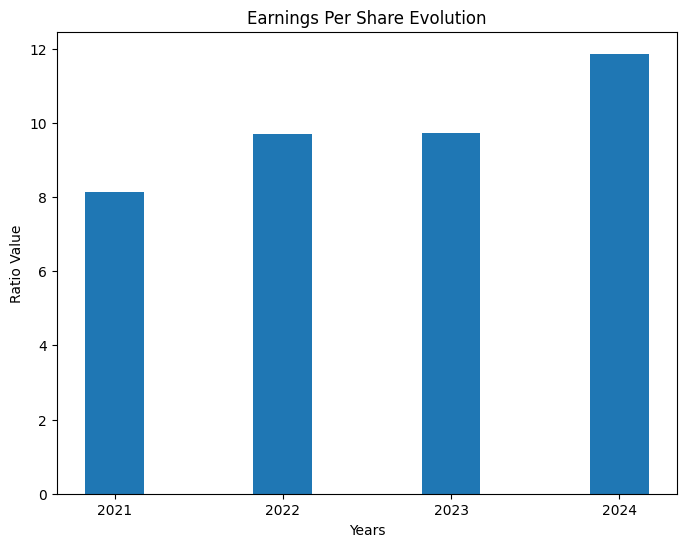

In [71]:
x_group = 4
x_values = pd.DatetimeIndex(df_income_stmt.index).year
y_values = df_income_stmt["EPS"].values
settings = {
    "title": "Earnings Per Share Evolution",
    "xlabel": "Years",
    "ylabel": "Ratio Value",
    "is_y_axis_formatted": False
}

display_bar_plot(x_group, x_values, y_values, settings)

### Revenue and Profit Charts

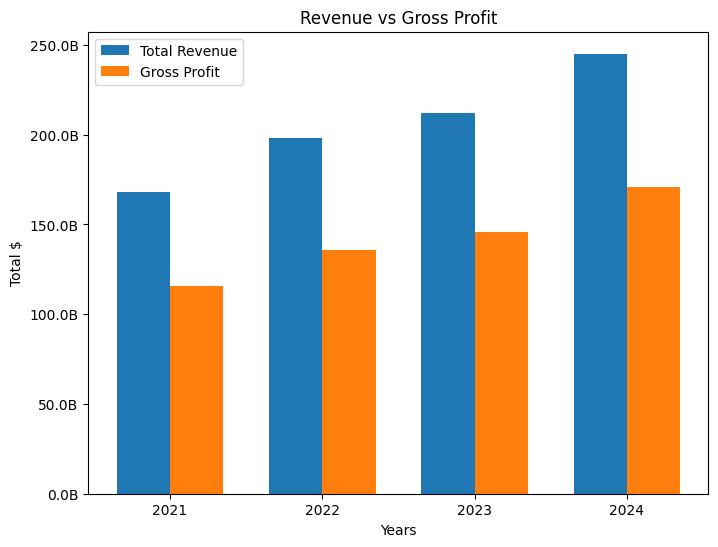

In [72]:
x_group = 4
x_values = pd.DatetimeIndex(df_income_stmt.index).year
y_group_1 = {
    "label": "Revenue",
    "values": df_income_stmt["Total Revenue"].values
}
y_group_2 = {
    "label": "Gross Profit",
    "values": df_income_stmt["Gross Profit"].values
}
settings = {
    "title": "Revenue vs Gross Profit",
    "xlabel": "Years",
    "ylabel": "Total $",
    "legend": ["Total Revenue", "Gross Profit"],
    "is_y_axis_formatted": True,
}

display_nested_bar_plot(x_group, x_values, y_group_1, y_group_2, settings)

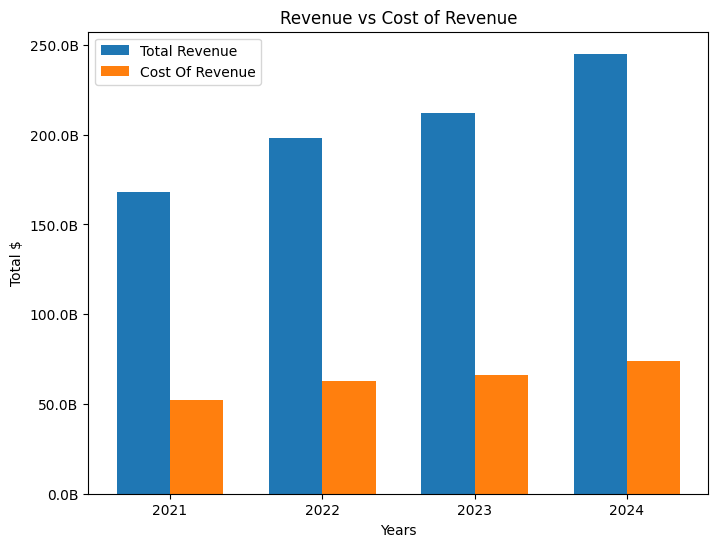

In [73]:
x_group = 4
x_values = pd.DatetimeIndex(df_income_stmt.index).year
y_group_1 = {
    "label": "Revenue",
    "values": df_income_stmt["Total Revenue"].values
}
y_group_2 = {
    "label": "Costs of Revenue",
    "values": df_income_stmt["Cost Of Revenue"].values
}
settings = {
    "title": "Revenue vs Cost of Revenue",
    "xlabel": "Years",
    "ylabel": "Total $",
    "legend": ["Total Revenue", "Cost Of Revenue"],
    "is_y_axis_formatted": True,
}

display_nested_bar_plot(x_group, x_values, y_group_1, y_group_2, settings)

### Expenses Breakdown

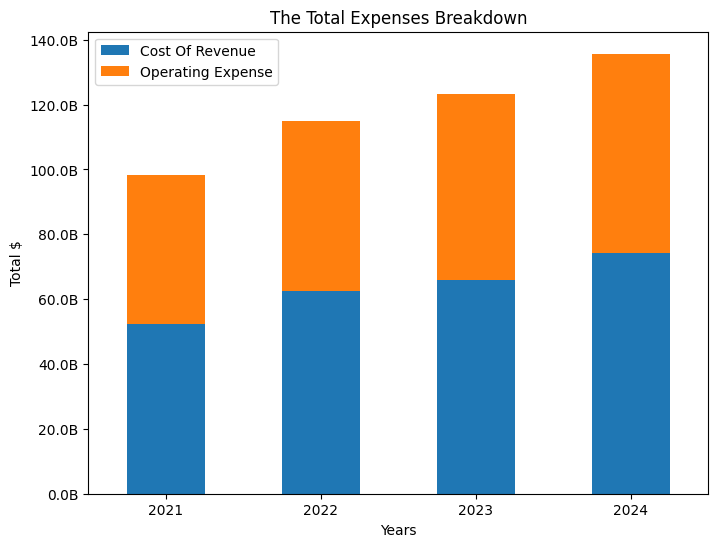

In [74]:
x_group = 4
x_values = pd.DatetimeIndex(df_income_stmt.index).year
y_values = df_income_stmt.loc[:, ["Cost Of Revenue", "Operating Expense"]]
settings = {
    "title": "The Total Expenses Breakdown",
    "xlabel": "Years",
    "ylabel": "Total $",
    "is_y_axis_formatted": True,
}
display_stacked_bar_plot(x_group, x_values, y_values, settings)

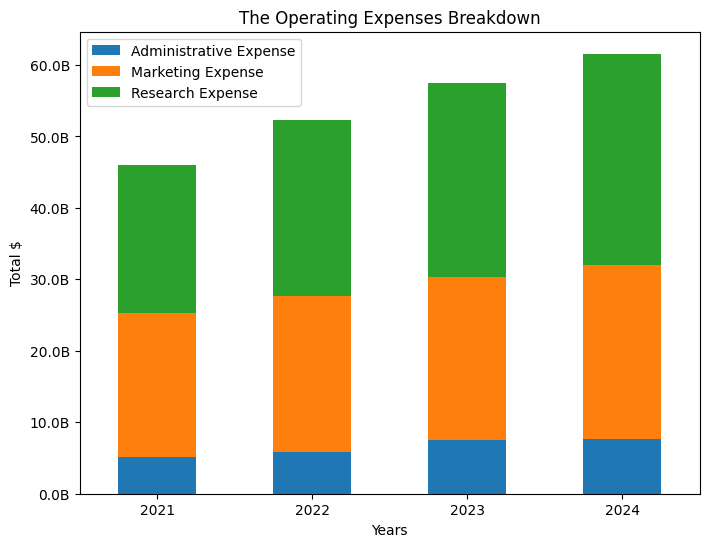

In [75]:
x_group = 4
x_values = pd.DatetimeIndex(df_income_stmt.index).year
y_values = df_income_stmt.loc[:, ["Administrative Expense", "Marketing Expense", "Research Expense"]]
settings = {
    "title": "The Operating Expenses Breakdown",
    "xlabel": "Years",
    "ylabel": "Total $",
    "is_y_axis_formatted": True,
}
display_stacked_bar_plot(x_group, x_values, y_values, settings)

### Income

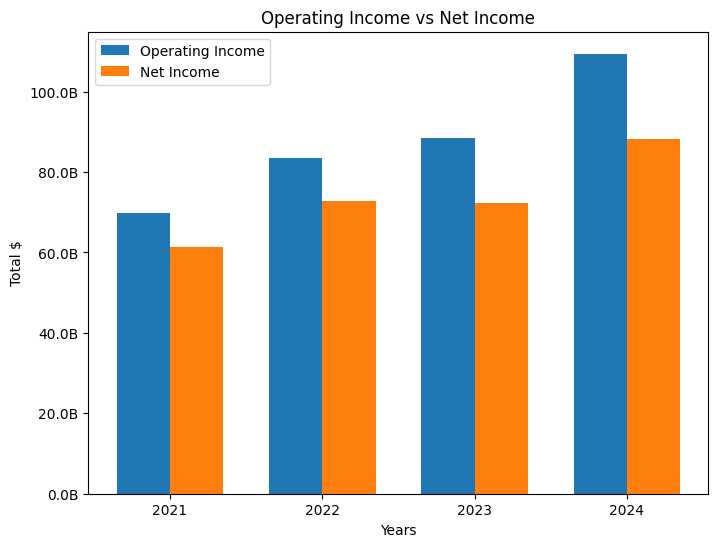

In [76]:
x_group = 4
x_values = pd.DatetimeIndex(df_income_stmt.index).year
y_group_1 = {
    "label": "Operating Income",
    "values": df_income_stmt["Operating Income"].values
}
y_group_2 = {
    "label": "Net Income",
    "values": df_income_stmt["Net Income"].values
}
settings = {
    "title": "Operating Income vs Net Income",
    "xlabel": "Years",
    "ylabel": "Total $",
    "legend": ["Operating Income", "Net Income"],
    "is_y_axis_formatted": True,
}

display_nested_bar_plot(x_group, x_values, y_group_1, y_group_2, settings)

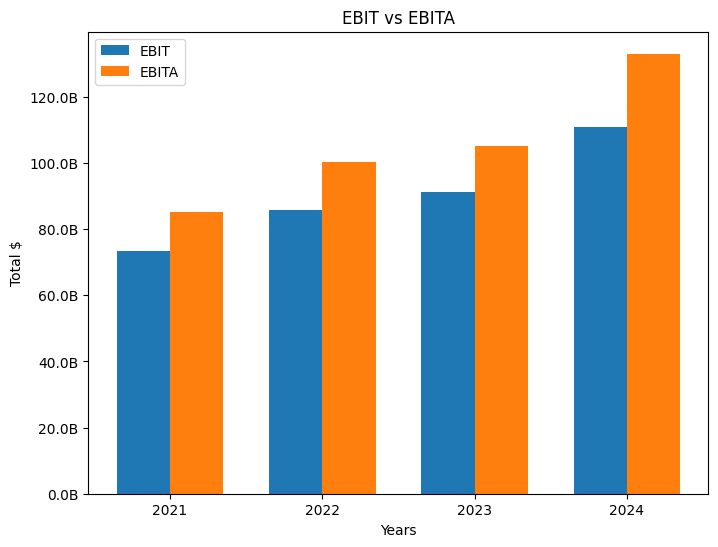

In [77]:
x_group = 4
x_values = pd.DatetimeIndex(df_income_stmt.index).year
y_group_1 = {
    "label": "EBIT",
    "values": df_income_stmt["EBIT"].values
}
y_group_2 = {
    "label": "EBITA",
    "values": df_income_stmt["EBITDA"].values
}
settings = {
    "title": "EBIT vs EBITA",
    "xlabel": "Years",
    "ylabel": "Total $",
    "legend": ["EBIT", "EBITA"],
    "is_y_axis_formatted": True,
}

display_nested_bar_plot(x_group, x_values, y_group_1, y_group_2, settings)

### Cash Flow

In [78]:
cashflow = company.cash_flow
cashflow

,2024-06-30,2023-06-30,2022-06-30,2021-06-30,2020-06-30
Free Cash Flow,74071000000.0,59475000000.0,65149000000.0,56118000000.0,NaN
Repurchase Of Capital Stock,-17254000000.0,-22245000000.0,-32696000000.0,-27385000000.0,NaN
Repayment Of Debt,-29070000000.0,-2750000000.0,-9023000000.0,-3750000000.0,NaN
Issuance Of Debt,29645000000.0,0.0,0.0,NaN,0.0
Issuance Of Capital Stock,2002000000.0,1866000000.0,1841000000.0,1693000000.0,NaN
Capital Expenditure,-44477000000.0,-28107000000.0,-23886000000.0,-20622000000.0,NaN
End Cash Position,18315000000.0,34704000000.0,13931000000.0,14224000000.0,NaN
Beginning Cash Position,34704000000.0,13931000000.0,14224000000.0,13576000000.0,NaN
Effect Of Exchange Rate Changes,-210000000.0,-194000000.0,-141000000.0,-29000000.0,NaN
Changes In Cash,-16179000000.0,20967000000.0,-152000000.0,677000000.0,NaN


In [79]:
fields = ["Operating Cash Flow", "Investing Cash Flow", "Financing Cash Flow",  "Capital Expenditure", "Free Cash Flow"]
dates = ["2023-06-30", "2022-06-30", "2021-06-30", "2020-06-30"]

df_cashflow = cashflow.loc[fields, dates]
df_cashflow

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
Operating Cash Flow,87582000000.0,89035000000.0,76740000000.0,NaN
Investing Cash Flow,-22680000000.0,-30311000000.0,-27577000000.0,NaN
Financing Cash Flow,-43935000000.0,-58876000000.0,-48486000000.0,NaN
Capital Expenditure,-28107000000.0,-23886000000.0,-20622000000.0,NaN
Free Cash Flow,59475000000.0,65149000000.0,56118000000.0,NaN


In [80]:
df_cashflow = df_cashflow.transpose()
df_cashflow = df_cashflow.sort_index()
df_cashflow

,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,Capital Expenditure,Free Cash Flow
2020-06-30,NaN,NaN,NaN,NaN,NaN
2021-06-30,76740000000.0,-27577000000.0,-48486000000.0,-20622000000.0,56118000000.0
2022-06-30,89035000000.0,-30311000000.0,-58876000000.0,-23886000000.0,65149000000.0
2023-06-30,87582000000.0,-22680000000.0,-43935000000.0,-28107000000.0,59475000000.0


### Cash Flow Analysis

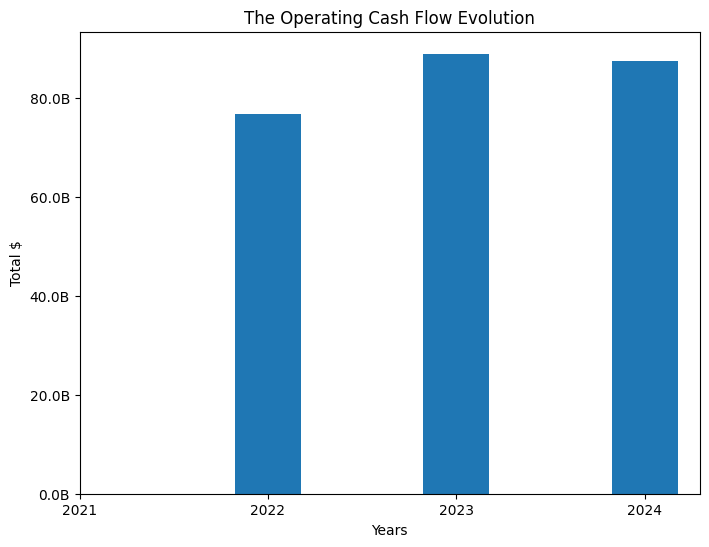

In [81]:
x_group = 4
x_values = pd.DatetimeIndex(df_balance.index).year
y_values = df_cashflow["Operating Cash Flow"].values
settings = {
    "title": "The Operating Cash Flow Evolution",
    "xlabel": "Years",
    "ylabel": "Total $",
    "is_y_axis_formatted": True
}

display_bar_plot(x_group, x_values, y_values, settings)

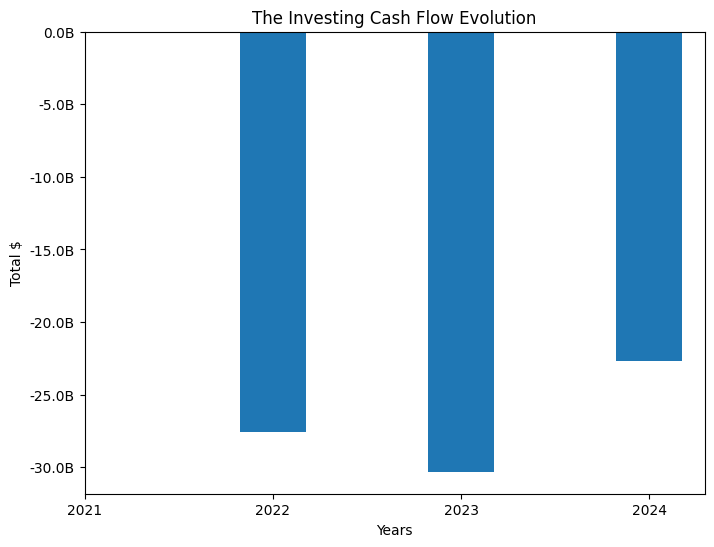

In [82]:
x_group = 4
x_values = pd.DatetimeIndex(df_balance.index).year
y_values = df_cashflow["Investing Cash Flow"].values
settings = {
    "title": "The Investing Cash Flow Evolution",
    "xlabel": "Years",
    "ylabel": "Total $",
    "is_y_axis_formatted": True
}

display_bar_plot(x_group, x_values, y_values, settings)

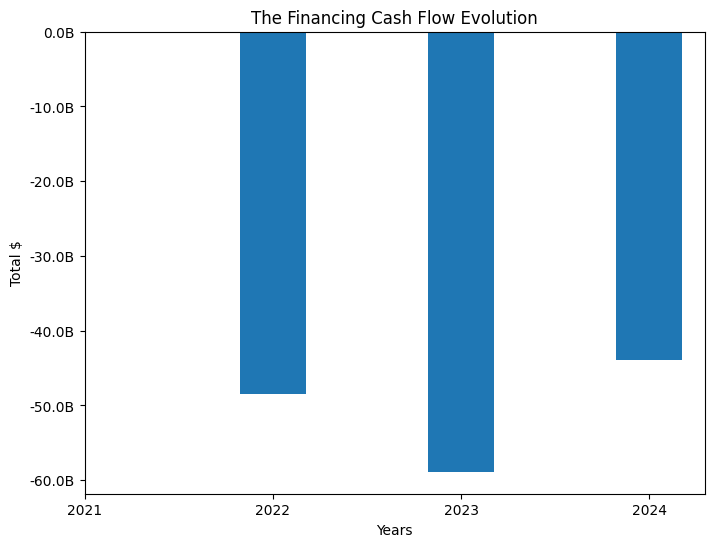

In [83]:
x_group = 4
x_values = pd.DatetimeIndex(df_balance.index).year
y_values = df_cashflow["Financing Cash Flow"].values
settings = {
    "title": "The Financing Cash Flow Evolution",
    "xlabel": "Years",
    "ylabel": "Total $",
    "is_y_axis_formatted": True
}

display_bar_plot(x_group, x_values, y_values, settings)

### Free Cash Flow

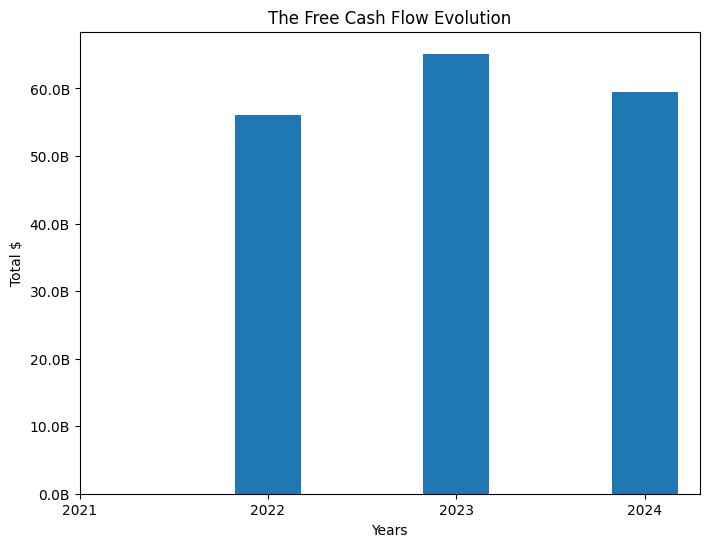

In [84]:
x_group = 4
x_values = pd.DatetimeIndex(df_balance.index).year
y_values = df_cashflow["Free Cash Flow"].values
settings = {
    "title": "The Free Cash Flow Evolution",
    "xlabel": "Years",
    "ylabel": "Total $",
    "is_y_axis_formatted": True
}

display_bar_plot(x_group, x_values, y_values, settings)

## Sector Comparison

In [85]:
from yahooquery import Screener

sector = "ms_technology"

screener = Screener()
sector_info = screener.get_screeners(sector)
sector_companies = sector_info[sector]["quotes"]

tickers = []

for sector in sector_companies:
    tickers.append(sector["symbol"])

financial_data = []

for ticker in tickers:
    stock = yf.Ticker(ticker)
    financials = {
        "Ticker": ticker,
        "Net Profit Margin": stock.info.get("profitMargins"),
        "P/E Ratio": stock.info.get("trailingPE"),
        "Return On Assets": stock.info.get("returnOnAssets"),
        "Return on Equity": stock.info.get("returnOnEquity"),
        "Operating Margin": stock.info.get("operatingMargins"),
    }
    financial_data.append(financials)
    
financial_df = pd.DataFrame(financial_data).set_index("Ticker")
financial_df = financial_df.fillna(0)
financial_df

,Net Profit Margin,P/E Ratio,Return On Assets,Return on Equity,Operating Margin
Ticker,,,,,
AAPL,0.26441,33.109590,0.22612,1.60583,0.29556
MSFT,0.35956,34.475420,0.14802,0.37133,0.43143
NVDA,0.53398,63.754383,0.49103,1.15658,0.64925
TSM,0.37854,32.361008,0.11497,0.26246,0.42547
AVGO,0.24104,64.060340,0.07426,0.22229,0.31765
ORCL,0.19764,35.735847,0.07156,1.93923,0.33261
ASML,0.26503,45.656315,0.12124,0.48567,0.29387
CRM,0.15304,45.281080,0.04344,0.09343,0.18800
SAP,0.07863,86.911390,0.06575,0.06100,0.23417


In [86]:
stats = financial_df.describe()
metrics_avg = stats.iloc[1, :]
metrics_avg

Net Profit Margin     0.229038
P/E Ratio            61.213905
Return On Assets      0.108140
Return on Equity      0.437507
Operating Margin      0.258619
Name: mean, dtype: float64

## Multiple Tickers Exploration


### Filtering a company by a certain condition

In [87]:
tickers = ["MSFT", "TSLA", "V", "JPM", "NVDA", "DIS", "KO", "WMT"]

companies = yf.Tickers(tickers)

data = {ticker: companies.tickers[ticker].info for ticker in tickers}

# Converting the dictionary to a DataFrame and transposing it
df_key_ratios = pd.DataFrame(data).transpose()
df_key_ratios.index.names = ["Ticker"]

df_key_ratios

,address1,city,state,zip,country,phone,website,industry,industryKey,industryDisp,...,returnOnEquity,freeCashflow,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio
Ticker,,,,,,,,,,,,,,,,,,,,,
MSFT,One Microsoft Way,Redmond,WA,98052-6399,United States,425 882 8080,https://www.microsoft.com,Software - Infrastructure,software-infrastructure,Software - Infrastructure,...,0.37133,56705249280,118547996672,0.097,0.152,0.69764,0.52804,0.43143,USD,2.1913
TSLA,1 Tesla Road,Austin,TX,78725,United States,512 516 8177,https://www.tesla.com,Auto Manufacturers,auto-manufacturers,Auto Manufacturers,...,0.20861,-907249984,11532000256,-0.462,0.023,0.1772,0.12776,0.0858,USD,3.664
V,PO Box 8999,San Francisco,CA,94128-8999,United States,650 432 3200,https://www.visa.com,Credit Services,credit-services,Credit Services,...,0.48548,14696625152,20213000192,0.202,0.096,0.97803,0.69832,0.66865,USD,1.4306
JPM,383 Madison Avenue,New York,NY,10179,United States,212 270 6000,https://www.jpmorganchase.com,Banks - Diversified,banks-diversified,Banks - Diversified,...,0.16545,NaN,-10339000320,0.288,0.317,NaN,NaN,0.50252,USD,4.0717
NVDA,2788 San Tomas Expressway,Santa Clara,CA,95051,United States,408 486 2000,https://www.nvidia.com,Semiconductors,semiconductors,Semiconductors,...,1.15658,29023750144,40524001280,6.5,2.621,0.75286,0.61768,0.64925,USD,1.2384
DIS,500 South Buena Vista Street,Burbank,CA,91521,United States,818 560 1000,https://www.thewaltdisneycompany.com,Entertainment,entertainment,Entertainment,...,0.0546,8273750016,13255000064,NaN,0.037,0.35358,0.18606,0.14913,USD,0.4022
KO,One Coca-Cola Plaza,Atlanta,GA,30313,United States,404 676 2121,https://www.coca-colacompany.com,Beverages - Non-Alcoholic,beverages-non-alcoholic,Beverages - Non - Alcoholic,...,0.38772,12131375104,11082999808,-0.05,0.033,0.60534,0.33539,0.32468,USD,3.072
WMT,702 South West 8th Street,Bentonville,AR,72716,United States,479-273-4000,https://corporate.walmart.com,Discount Stores,discount-stores,Discount Stores,...,0.23464,7845000192,35342000128,2.043,0.06,0.24499,0.06047,0.04236,USD,3.1154


#### By Sector

In [88]:
tech_sector = df_key_ratios[df_key_ratios["sector"] == "Technology"]
tech_sector

,address1,city,state,zip,country,phone,website,industry,industryKey,industryDisp,...,returnOnEquity,freeCashflow,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio
Ticker,,,,,,,,,,,,,,,,,,,,,
MSFT,One Microsoft Way,Redmond,WA,98052-6399,United States,425 882 8080,https://www.microsoft.com,Software - Infrastructure,software-infrastructure,Software - Infrastructure,...,0.37133,56705249280,118547996672,0.097,0.152,0.69764,0.52804,0.43143,USD,2.1913
NVDA,2788 San Tomas Expressway,Santa Clara,CA,95051,United States,408 486 2000,https://www.nvidia.com,Semiconductors,semiconductors,Semiconductors,...,1.15658,29023750144,40524001280,6.5,2.621,0.75286,0.61768,0.64925,USD,1.2384


#### By Earnings Per Share

In [89]:
target_eps = 5

eps_above_target = df_key_ratios[df_key_ratios["trailingEps"] > target_eps]
eps_above_target


,address1,city,state,zip,country,phone,website,industry,industryKey,industryDisp,...,returnOnEquity,freeCashflow,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio
Ticker,,,,,,,,,,,,,,,,,,,,,
MSFT,One Microsoft Way,Redmond,WA,98052-6399,United States,425 882 8080,https://www.microsoft.com,Software - Infrastructure,software-infrastructure,Software - Infrastructure,...,0.37133,56705249280,118547996672,0.097,0.152,0.69764,0.52804,0.43143,USD,2.1913
V,PO Box 8999,San Francisco,CA,94128-8999,United States,650 432 3200,https://www.visa.com,Credit Services,credit-services,Credit Services,...,0.48548,14696625152,20213000192,0.202,0.096,0.97803,0.69832,0.66865,USD,1.4306
JPM,383 Madison Avenue,New York,NY,10179,United States,212 270 6000,https://www.jpmorganchase.com,Banks - Diversified,banks-diversified,Banks - Diversified,...,0.16545,NaN,-10339000320,0.288,0.317,NaN,NaN,0.50252,USD,4.0717


#### By Total Revenue

In [90]:
target_revenue = 200000000000

revenue_above_target = df_key_ratios[df_key_ratios["totalRevenue"] > target_revenue]
revenue_above_target

,address1,city,state,zip,country,phone,website,industry,industryKey,industryDisp,...,returnOnEquity,freeCashflow,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio
Ticker,,,,,,,,,,,,,,,,,,,,,
MSFT,One Microsoft Way,Redmond,WA,98052-6399,United States,425 882 8080,https://www.microsoft.com,Software - Infrastructure,software-infrastructure,Software - Infrastructure,...,0.37133,56705249280,118547996672,0.097,0.152,0.69764,0.52804,0.43143,USD,2.1913
WMT,702 South West 8th Street,Bentonville,AR,72716,United States,479-273-4000,https://corporate.walmart.com,Discount Stores,discount-stores,Discount Stores,...,0.23464,7845000192,35342000128,2.043,0.06,0.24499,0.06047,0.04236,USD,3.1154


### Sorting companies by certain condition

In [91]:
tickers = ["MSFT", "TSLA", "V", "JPM", "NVDA", "DIS", "KO", "WMT"]

companies = yf.Tickers(tickers)

dataframes = {}

for ticker in tickers:
    df = pd.DataFrame(companies.tickers[ticker].income_stmt).transpose()
    df["Ticker Symbol"] = ticker
    dataframes[ticker] = df

df_all_companies = pd.concat(dataframes.values(), ignore_index=False)
df_all_companies.index.names = ["Date"]

df_all_companies

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Professional Expense And Contract Services Expense,Other Non Interest Expense,Net Income Discontinuous Operations,Gain On Sale Of Ppe,Gain On Sale Of Business,Earnings From Equity Interest,Impairment Of Capital Assets,Other Operating Expenses,Amortization,Amortization Of Intangibles Income Statement
Date,,,,,,,,,,,,,,,,,,,,,
2024-06-30,-99918000.0,0.182,133558000000.0,-549000000.0,-549000000.0,88136000000.0,22287000000.0,74114000000.0,133009000000.0,110722000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-30,-2850000.0,0.19,105155000000.0,-15000000.0,-15000000.0,72361000000.0,13861000000.0,65863000000.0,105140000000.0,91279000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-30,43754000.0,0.131,99905000000.0,334000000.0,334000000.0,72738000000.0,14460000000.0,62650000000.0,100239000000.0,85779000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-30,180160797.164637,0.138266,83831000000.0,1303000000.0,1303000000.0,61271000000.0,11686000000.0,52232000000.0,85134000000.0,73448000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-31,0.0,0.21,14796000000.0,0.0,0.0,14999000000.0,4667000000.0,79113000000.0,14796000000.0,10129000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-31,-14080000.0,0.08,17833000000.0,-176000000.0,-176000000.0,12583000000.0,3747000000.0,60609000000.0,17657000000.0,13910000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31,2970000.0,0.11,9598000000.0,27000000.0,27000000.0,5524000000.0,2911000000.0,40217000000.0,9625000000.0,6714000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31,0.0,0.25,4224000000.0,0.0,0.0,721000000.0,2322000000.0,24906000000.0,4224000000.0,1902000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### By Net Income

In [92]:
net_income_target = 10000000000

net_income_above_zero = df_all_companies[df_all_companies["Net Income"] > net_income_target]
list_companies = net_income_above_zero["Ticker Symbol"].unique().tolist()

list_companies


['MSFT', 'TSLA', 'V', 'JPM', 'NVDA', 'KO', 'WMT']